<a href="https://colab.research.google.com/github/rei-smz/cifar10-models/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.utils import to_categorical

## Load Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


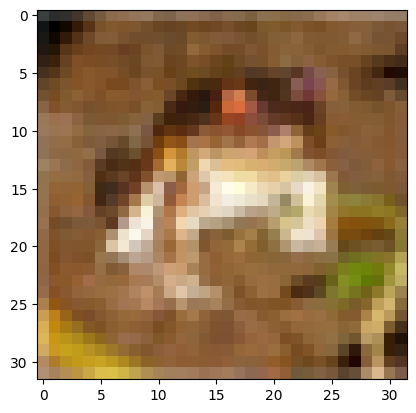

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# print the shapes
print("Training images shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape)  # (50000, 1)
print("Testing images shape:", x_test.shape)  # (10000, 32, 32, 3)
print("Testing labels shape:", y_test.shape)  # (10000, 1)
img_shape = (x_train.shape[1], x_train.shape[2], 3) # height, width, channel

# display an image in the training set
plt.imshow(x_train[0])

# one-hot encode on labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build Models

### Basic Model

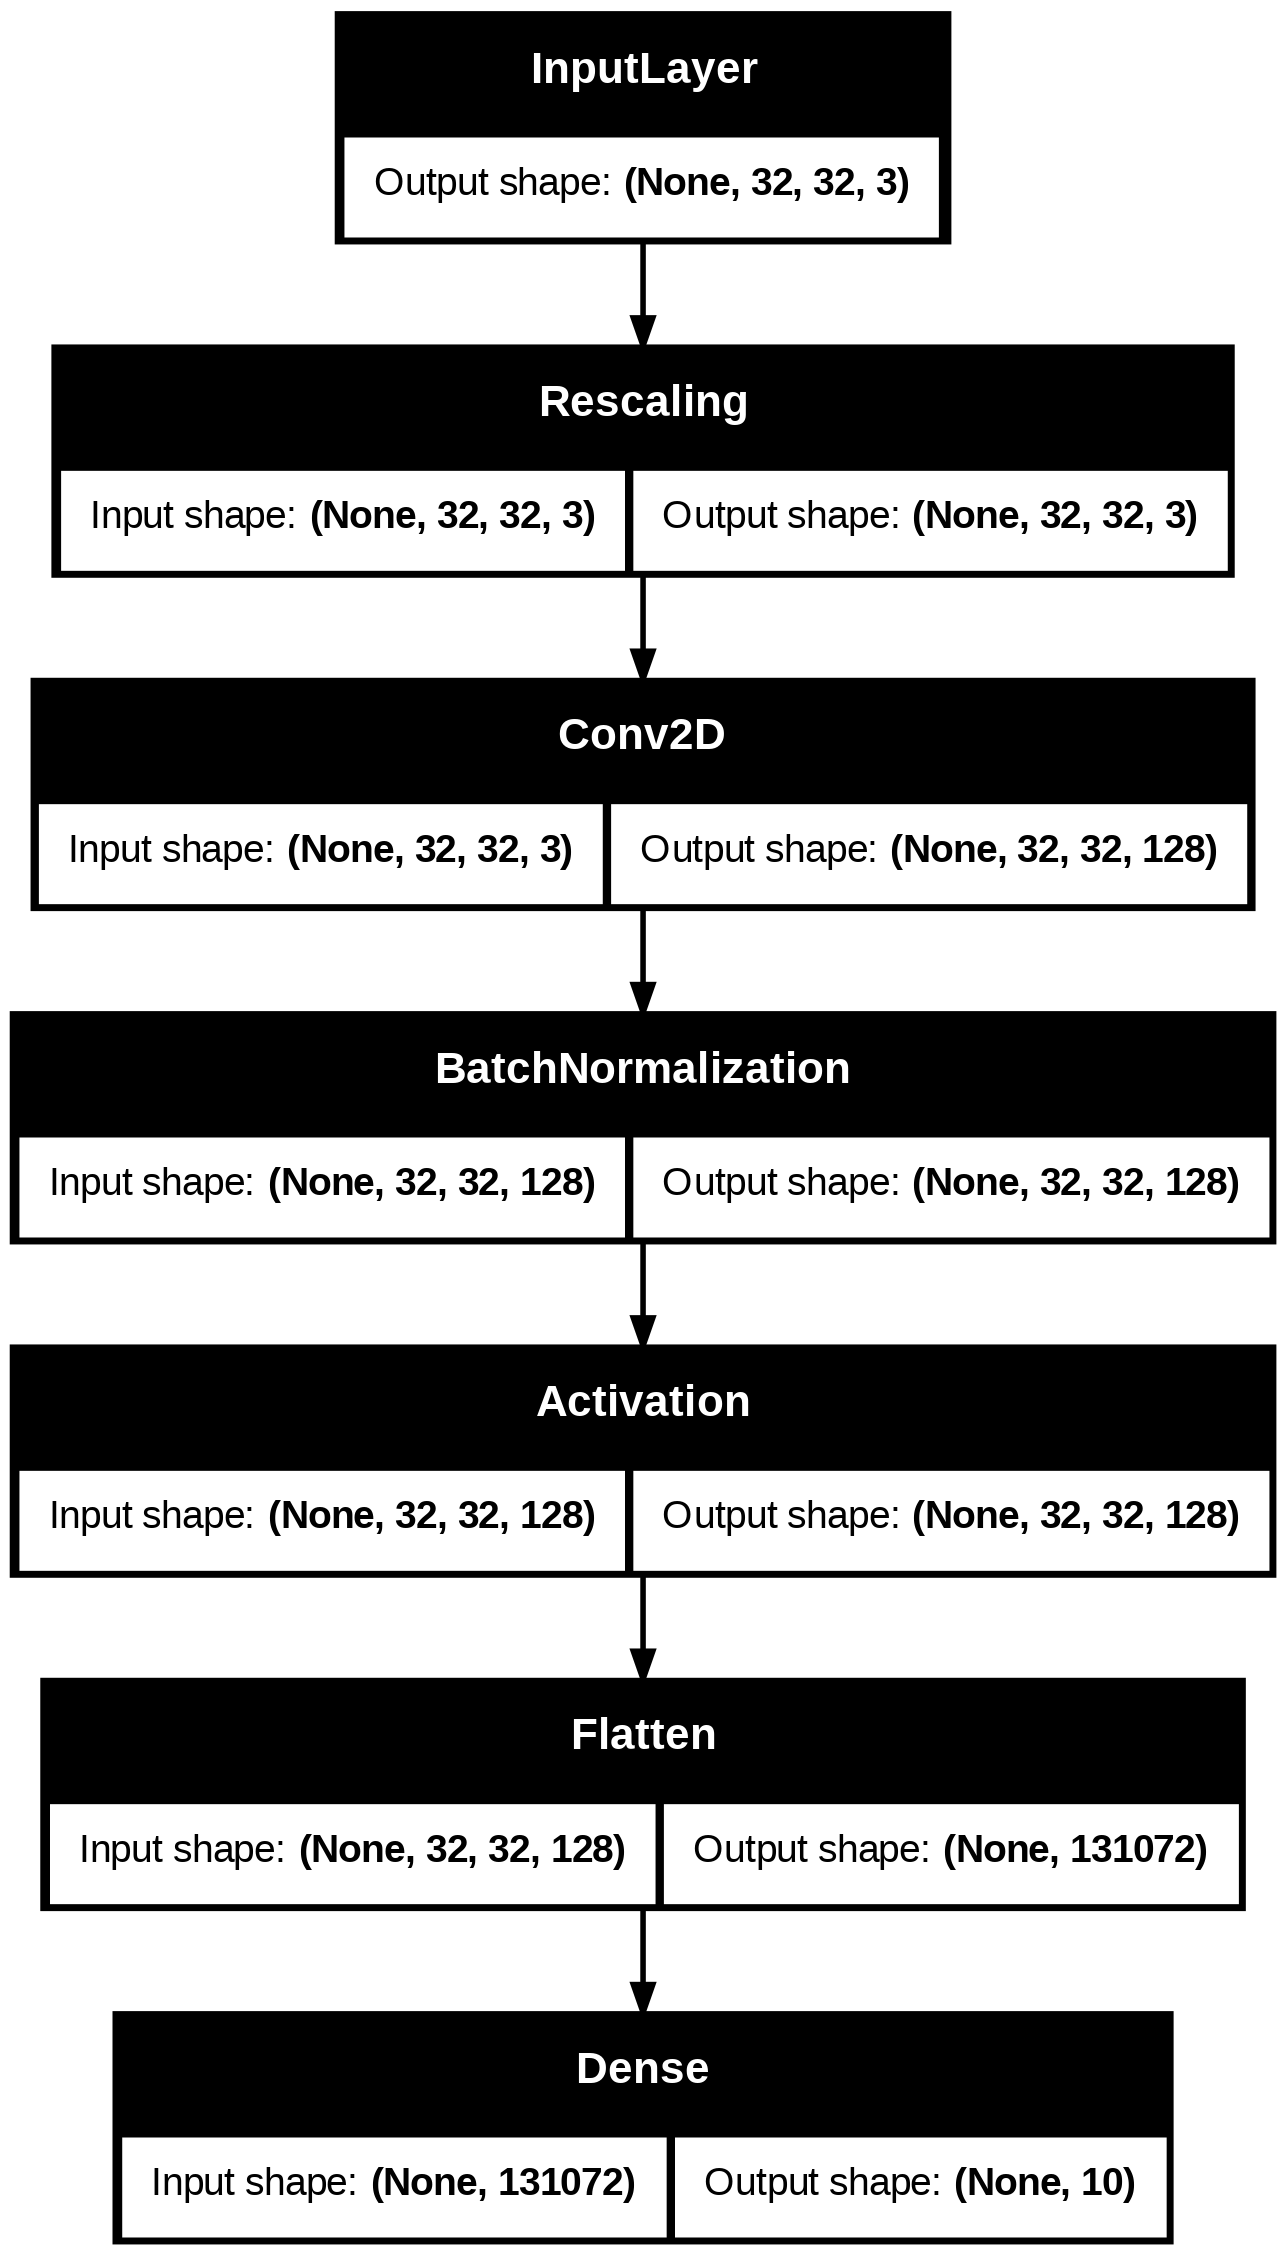

In [ ]:
def build_basic_model(input_shape, num_classes) -> keras.Model:
  inputs = keras.Input(shape=input_shape)
  x = keras.layers.Rescaling(1.0 / 255)(inputs)
  x = keras.layers.Conv2D(128, 3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation("relu")(x)
  x = keras.layers.Flatten()(x)

  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
  return keras.Model(inputs, outputs)

basic_model = build_basic_model(img_shape, num_classes)
keras.utils.plot_model(basic_model, show_shapes=True)

### Completed Model

In [ ]:
# Data Augmentation
data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]


def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images

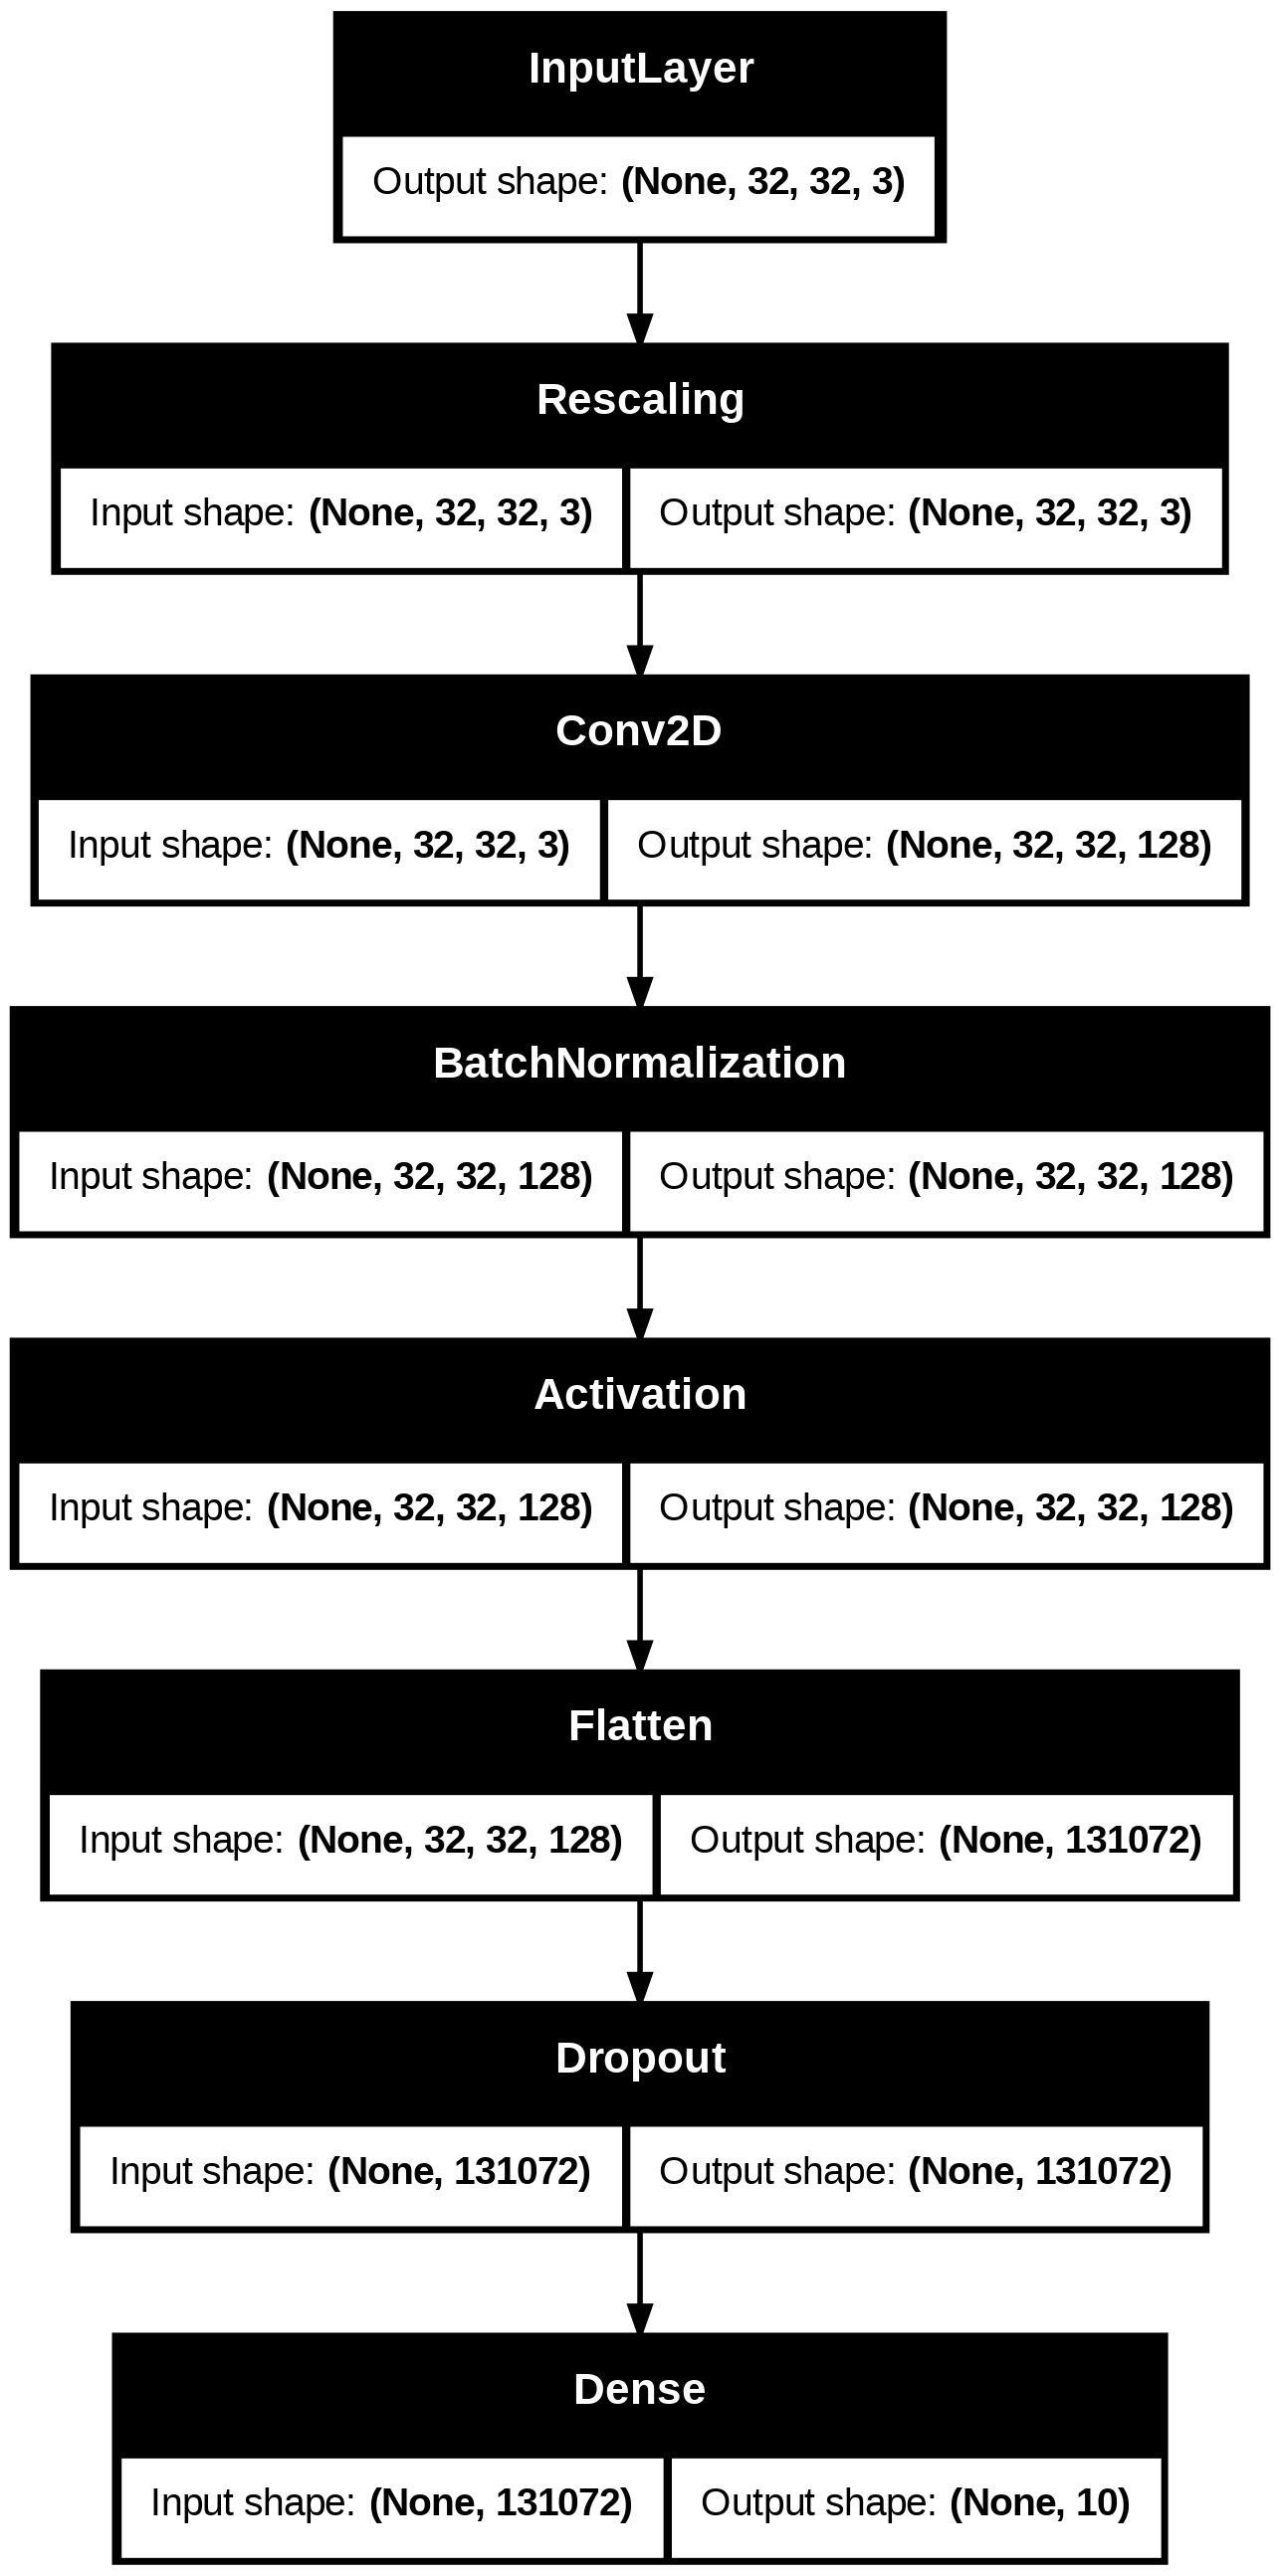

In [ ]:
def build_completed_model(input_shape, num_classes) -> keras.Model:
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)
  x = keras.layers.Rescaling(1.0 / 255)(inputs)
  x = keras.layers.Conv2D(128, 3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation("relu")(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.5)(x)

  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
  return keras.Model(inputs, outputs)

completed_model = build_completed_model(img_shape, num_classes)
keras.utils.plot_model(completed_model, show_shapes=True)

## Training

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - acc: 0.4010 - loss: 2.2946 - val_acc: 0.4210 - val_loss: 2.0061
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.6180 - loss: 1.1324 - val_acc: 0.4368 - val_loss: 2.0017
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.6732 - loss: 0.9550 - val_acc: 0.4741 - val_loss: 1.8390
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.7112 - loss: 0.8409 - val_acc: 0.5147 - val_loss: 1.6716
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.7410 - loss: 0.7623 - val_acc: 0.4705 - val_loss: 2.1975
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.7639 - loss: 0.6840 - val_acc: 0.5210 - val_loss: 1.7549
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.7835 - loss: 0.6212 - val_acc: 0.5014 - val_loss: 1.9741
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8074 - loss: 0.5573 - val_acc: 0.4753 - val_loss: 2.1808
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━

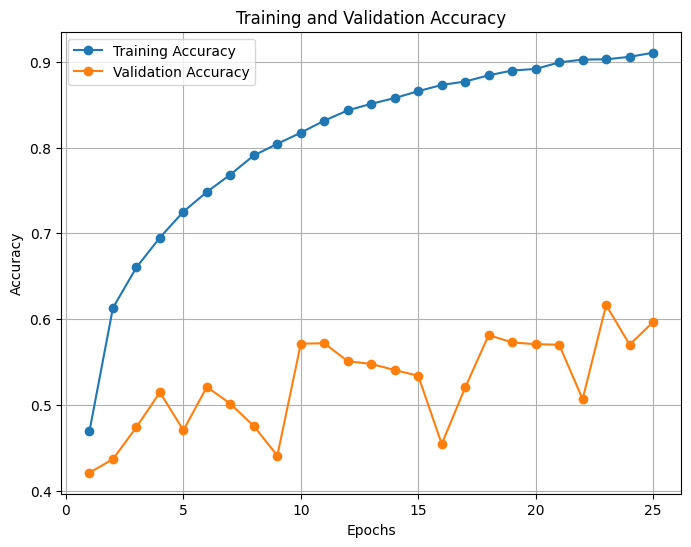

In [ ]:
epochs = 25
callbacks = [
  keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

model = completed_model
model.compile(
  optimizer=keras.optimizers.Adam(3e-4),
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  callbacks=callbacks,
  validation_data=(x_test, y_test)
)

# 获取训练和验证的准确率
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]

# 定义 x 轴（epoch 数）
epochs_range = range(1, len(train_acc) + 1)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_acc, label="Training Accuracy", marker="o")
plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()